In [ ]:
!pip install numpy
!pip install matplotlib
!pip install pillow
!pip install scikit-image
!pip install scipy

In [3]:
import matplotlib.pyplot as plt
from data_hoda import load_hoda
import numpy as np

In [4]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation

In [ ]:
#مثال کلی
model=Sequential()
model.add(layers.Conv2D(8,(5,5),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16,(5,5),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
#falt
model.add(layers.Flatten())
model.add(layers.Dense(120,activation='relu'))
model.add(Dropout(0.5)) #bray accuracy behtar
model.add(layers.Dense(84,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

دیتا رو لود و آمده کنیم:


In [7]:
np.random.seed(123)

In [41]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(training_sample_size=3500, test_sample_size=400, size=28)

In [42]:
#processing input data
x_train=np.array(x_train_original)
x_test=np.array(x_test_original)

In [43]:
#normalize
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /=255
x_test /=255

#reshape
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [45]:
#label process
y_train=keras.utils.to_categorical(y_train_original,num_classes=10)
y_test=keras.utils.to_categorical(y_test_original,num_classes=10)

In [46]:
#test and validation set
x_val=x_test[200:]
y_val=y_test[200:]

x_test=x_test[:200]
y_test=y_test[:200]

1.تعریف مدل

In [47]:
model=Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
#falt
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(Dropout(0.5)) #bray accuracy behtar
model.add(layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

2. (معیار بد بودن مدل و روش بهینه سازی با معیارش )  فاز کامپایل

In [49]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

3. آموزش مدل

In [62]:
 history = model.fit(x_train,y_train,epochs=100,batch_size=256,validation_data=(x_val,y_val))

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - accuracy: 0.9918 - loss: 0.0217 - val_accuracy: 0.9850 - val_loss: 0.0531
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.9953 - loss: 0.0131 - val_accuracy: 0.9900 - val_loss: 0.0392
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.9974 - loss: 0.0095 - val_accuracy: 0.9850 - val_loss: 0.0431
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - accuracy: 0.9931 - loss: 0.0205 - val_accuracy: 0.9800 - val_loss: 0.0940
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.9960 - loss: 0.0128 - val_accuracy: 0.9800 - val_loss: 0.0463
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.9945 - loss: 0.0169 - val_accuracy: 0.9900 - val_loss: 0.0332
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - accuracy: 0.9957 - loss: 0.0115 - val_accuracy: 0.9750 - val_loss: 0.0659
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.9939 - loss: 0.0192 - val_accu

ارزیابی

In [63]:
acc=history.history['val_accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

ephocs= range(len(acc))


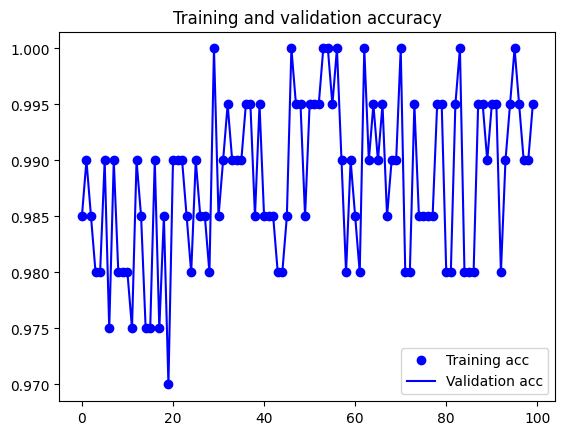

<Figure size 640x480 with 0 Axes>

In [64]:
plt.plot(ephocs,acc,'bo',label='Training acc')
plt.plot(ephocs,val_acc,'b',label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.show()

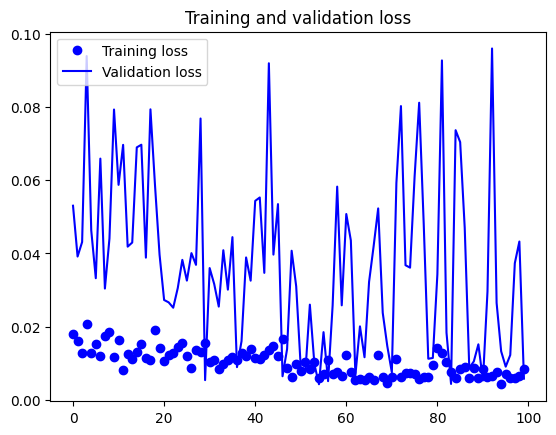

In [65]:
plt.plot(ephocs,loss,'bo',label='Training loss')
plt.plot(ephocs,val_loss,'b',label='Validation loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()